In [ ]:
# # Install sentence-transformers and transformers
# !pip install sentence-transformers transformers
# !pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

# Task 1

In [ ]:
# Import libraries
import torch
import torch.nn as nn
from transformers import AutoTokenizer, AutoModel

In [ ]:
class SentenceTransformer(nn.Module):
    def __init__(self, model_name='sentence-transformers/all-mpnet-base-v2', pooling_strategy='mean'):
        """
        Initializes the Sentence Transformer.

        Args:
            model_name (str): Pre-trained transformer model identifier.
            pooling_strategy (str): Strategy to pool token embeddings into a sentence embedding.
        """
        super(SentenceTransformer, self).__init__()
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.transformer = AutoModel.from_pretrained(model_name)

        if pooling_strategy not in ['mean', 'cls']:
            raise ValueError("Unsupported pooling strategy. Choose 'mean' or 'cls'.")
        self.pooling_strategy = pooling_strategy

    def forward(self, sentences):
        """
        Forward pass to obtain sentence embeddings.
        """
        # Tokenize input
        inputs = self.tokenizer(sentences, return_tensors="pt", padding=True, truncation=True)

        # Forward pass
        outputs = self.transformer(**inputs)
        token_embeddings = outputs.last_hidden_state

        if self.pooling_strategy == 'cls':
            sentence_embeddings = token_embeddings[:, 0, :]
        else:
            sentence_embeddings = torch.mean(token_embeddings, dim=1)

        return sentence_embeddings

model = SentenceTransformer(model_name='sentence-transformers/all-mpnet-base-v2', pooling_strategy='mean')
model.eval()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

SentenceTransformer(
  (transformer): MPNetModel(
    (embeddings): MPNetEmbeddings(
      (word_embeddings): Embedding(30527, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): MPNetEncoder(
      (layer): ModuleList(
        (0-11): 12 x MPNetLayer(
          (attention): MPNetAttention(
            (attn): MPNetSelfAttention(
              (q): Linear(in_features=768, out_features=768, bias=True)
              (k): Linear(in_features=768, out_features=768, bias=True)
              (v): Linear(in_features=768, out_features=768, bias=True)
              (o): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
      

In [ ]:
sentences = [
    "Highly intelligent, dogs have the capability of expressing their joy and happiness by wagging their tails.",
    "They are known to be the most loyal of animals. Dogs can sense your pain and can be your best friend.",
    "They can sense emotions, and when you are sad, they become sad and when you are happy, they are happy."
]

with torch.no_grad():
    for i, sentence in enumerate(sentences):
        embedding = model(sentence)
        print(f"Shape of embedding for sentence {i+1}: {embedding.shape}")

Shape of embedding for sentence 1: torch.Size([1, 768])
Shape of embedding for sentence 2: torch.Size([1, 768])
Shape of embedding for sentence 3: torch.Size([1, 768])


# Task 2 - initial implementation

In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# from torch.utils.data import Dataset, DataLoader
# from transformers import AutoTokenizer, AutoModel, AdamW
# from datasets import load_dataset
# from itertools import cycle


# # Multi-Task Model Definition
# class MultiTaskSentenceTransformer(nn.Module):
#     def __init__(self,
#                  model_name='sentence-transformers/all-mpnet-base-v2',
#                  pooling_strategy='mean',
#                  num_classification_labels=4,
#                  num_ner_labels=5):
#         """
#         Multi-task model that extends a Sentence Transformer to support:
#           - Task A: Sentence Classification.
#           - Task B: Named Entity Recognition (NER).

#         Args:
#             model_name (str): Pre-trained transformer model identifier.
#             pooling_strategy (str): Pooling strategy ('mean' or 'cls').
#             num_classification_labels (int): Number of classes (e.g., AG News has 4).
#             num_ner_labels (int): Number of NER labels (reduced set: O, PER, ORG, LOC, MISC).
#         """
#         super(MultiTaskSentenceTransformer, self).__init__()
#         self.tokenizer = AutoTokenizer.from_pretrained(model_name)
#         self.transformer = AutoModel.from_pretrained(model_name)
#         if pooling_strategy not in ['mean', 'cls']:
#             raise ValueError("Unsupported pooling strategy. Choose 'mean' or 'cls'.")
#         self.pooling_strategy = pooling_strategy
#         hidden_size = self.transformer.config.hidden_size
#         self.classifier = nn.Linear(hidden_size, num_classification_labels)
#         self.ner_head = nn.Linear(hidden_size, num_ner_labels)

#     def forward(self, sentences=None, inputs=None):
#         if inputs is None:
#             if sentences is None:
#                 raise ValueError("Either sentences or inputs must be provided.")
#             inputs = self.tokenizer(sentences, return_tensors="pt", padding=True, truncation=True)
#         device = next(self.parameters()).device
#         inputs = {k: v.to(device) for k, v in inputs.items()}

#         outputs = self.transformer(**inputs)
#         token_embeddings = outputs.last_hidden_state  # (batch_size, seq_length, hidden_size)

#         if self.pooling_strategy == 'cls':
#             sentence_embeddings = token_embeddings[:, 0, :]
#         else:
#             sentence_embeddings = torch.mean(token_embeddings, dim=1)

#         classification_logits = self.classifier(sentence_embeddings)
#         ner_logits = self.ner_head(token_embeddings)

#         return {
#             'classification_logits': classification_logits,
#             'ner_logits': ner_logits,
#             'inputs': inputs
#         }

# # Dataset for AG News Classification
# class AGNewsDataset(Dataset):
#     def __init__(self, split='train'):
#         self.dataset = load_dataset("ag_news", split=split)

#     def __len__(self):
#         return len(self.dataset)

#     def __getitem__(self, idx):
#         item = self.dataset[idx]
#         return {
#             'text': item['text'],
#             'label': item['label']
#         }

# # Dataset for CoNLL2003 NER (with label alignment)
# class CoNLL2003NERDataset(Dataset):
#     def __init__(self, split='train', tokenizer=None, max_length=128):
#         self.dataset = load_dataset("conll2003", split=split, trust_remote_code=True)
#         self.tokenizer = tokenizer
#         self.max_length = max_length
#         self.orig_ner_labels = self.dataset.features["ner_tags"].feature.names
#         # Reduced label mapping
#         self.reduced_label_map = {"O": 0, "PER": 1, "ORG": 2, "LOC": 3, "MISC": 4}

#     def align_labels(self, tokens, ner_tags):
#         """
#         Convert original ner_tags to reduced labels.
#         """
#         reduced_tags = []
#         for tag in ner_tags:
#             label = self.orig_ner_labels[tag]
#             if label == "O":
#                 reduced_tags.append(self.reduced_label_map["O"])
#             else:
#                 # Remove the B- or I- prefix.
#                 entity = label.split("-")[-1]
#                 reduced_tags.append(self.reduced_label_map.get(entity, 0))
#         return reduced_tags

#     def __len__(self):
#         return len(self.dataset)

#     def __getitem__(self, idx):
#         item = self.dataset[idx]
#         tokens = item["tokens"]
#         ner_tags = item["ner_tags"]
#         reduced_tags = self.align_labels(tokens, ner_tags)
#         # Tokenize with `is_split_into_words=True` so that we can align subwords.
#         encoding = self.tokenizer(tokens, is_split_into_words=True,
#                                   truncation=True, padding='max_length',
#                                   max_length=self.max_length, return_tensors="pt")
#         # Get word_ids to map subword tokens back to original tokens.
#         word_ids = encoding.word_ids(batch_index=0)
#         aligned_labels = []
#         previous_word_idx = None
#         for word_idx in word_ids:
#             if word_idx is None:
#                 aligned_labels.append(-100)  # Special tokens ignored
#             elif word_idx != previous_word_idx:
#                 aligned_labels.append(reduced_tags[word_idx])
#             else:
#                 aligned_labels.append(-100)
#             previous_word_idx = word_idx
#         # Remove batch dimension.
#         encoding = {k: v.squeeze(0) for k, v in encoding.items()}
#         encoding["labels"] = torch.tensor(aligned_labels)
#         return encoding

# # Hyperparameters
# num_epochs = 100
# batch_size = 8
# learning_rate = 5e-5
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Instantiate the multi-task model.
# model = MultiTaskSentenceTransformer(
#     model_name='sentence-transformers/all-mpnet-base-v2',
#     pooling_strategy='mean',
#     num_classification_labels=4,  # AG News has 4 classes
#     num_ner_labels=5              # Reduced NER labels: O, PER, ORG, LOC, MISC
# )
# model.to(device)

# # Prepare datasets and dataloaders (using a subset for quick demo).
# agnews_dataset = AGNewsDataset(split='train[:200]')
# ner_tokenizer = model.tokenizer  # Reuse the model's tokenizer.
# conll_dataset = CoNLL2003NERDataset(split='train[:200]', tokenizer=ner_tokenizer)

# agnews_dataloader = DataLoader(agnews_dataset, batch_size=batch_size, shuffle=True)
# conll_dataloader = DataLoader(conll_dataset, batch_size=batch_size, shuffle=True)

# # Define loss functions and optimizer.
# classification_loss_fn = nn.CrossEntropyLoss()
# ner_loss_fn = nn.CrossEntropyLoss(ignore_index=-100)
# optimizer = AdamW(model.parameters(), lr=learning_rate)


# # Training Loop (Alternating between tasks)
# num_steps = max(len(agnews_dataloader), len(conll_dataloader))
# print("Starting training...")
# for epoch in range(num_epochs):
#     model.train()
#     total_class_loss = 0.0
#     total_ner_loss = 0.0
#     steps = 0

#     # Create iterators for both tasks.
#     agnews_iter = cycle(agnews_dataloader)
#     conll_iter = cycle(conll_dataloader)

#     for _ in range(num_steps):
#         optimizer.zero_grad()
#         loss = 0.0

#         # Classification Step
#         batch_cls = next(agnews_iter)
#         texts = batch_cls['text']
#         cls_labels = torch.tensor(batch_cls['label']).to(device)
#         outputs_cls = model(sentences=texts)
#         cls_logits = outputs_cls['classification_logits']
#         loss_cls = classification_loss_fn(cls_logits, cls_labels)
#         loss += loss_cls
#         total_class_loss += loss_cls.item()

#         #NER Step
#         batch_ner = next(conll_iter)
#         outputs_ner = model(inputs=batch_ner)  # Using pre-tokenized inputs.
#         ner_logits = outputs_ner['ner_logits']  # (batch_size, seq_len, num_ner_labels)
#         ner_labels = batch_ner['labels'].to(device)  # (batch_size, seq_len)
#         loss_ner = ner_loss_fn(ner_logits.view(-1, model.ner_head.out_features), ner_labels.view(-1))
#         loss += loss_ner
#         total_ner_loss += loss_ner.item()

#         loss.backward()
#         optimizer.step()
#         steps += 1

#     avg_cls_loss = total_class_loss / steps
#     avg_ner_loss = total_ner_loss / steps
#     print(f"Epoch {epoch+1}/{num_epochs} - Avg Classification Loss: {avg_cls_loss:.4f}, Avg NER Loss: {avg_ner_loss:.4f}")

# print("Training complete.")


# # Evaluation
# model.eval()
# classification_labels = {0: "World", 1: "Sports", 2: "Business", 3: "Sci/Tech"}
# ner_labels = {0: "O", 1: "PER", 2: "ORG", 3: "LOC", 4: "MISC"}

# sample_texts = [
#     "Stocks soared as the market reacted positively to the new fiscal policy.",
#     "The local team clinched the championship in a stunning overtime victory."
# ]
# with torch.no_grad():
#     outputs_demo = model(sentences=sample_texts)
#     cls_logits_demo = outputs_demo['classification_logits']
#     for i, text in enumerate(sample_texts):
#         probs = F.softmax(cls_logits_demo[i], dim=0)
#         pred_label = torch.argmax(probs).item()
#         print(f"\n\nSentence: {text}")
#         print(f"  Predicted Category: {classification_labels[pred_label]}")
#         print(f"  Probabilities: {probs.tolist()}")
#         print("-" * 80)


# # NER demo
# sample_ner = conll_dataset[0]  # Get the first example from the NER dataset.


# sample_ner_batch = {k: v.unsqueeze(0) if isinstance(v, torch.Tensor) else v
#                     for k, v in sample_ner.items()}

# with torch.no_grad():
#     outputs_sample = model(inputs=sample_ner_batch)
#     ner_logits_sample = outputs_sample['ner_logits'][0]  # (seq_length, num_ner_labels)
#     ner_pred_indices = torch.argmax(ner_logits_sample, dim=1).tolist()

# tokens = model.tokenizer.convert_ids_to_tokens(sample_ner["input_ids"].tolist())

# ner_output = [f"{token}: {ner_labels.get(idx, 'Unknown')}" for token, idx in zip(tokens, ner_pred_indices)]
# print("NER Sample Predictions:")
# print(" | ".join(ner_output))

README.md:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/12.3k [00:00<?, ?B/s]

conll2003.py:   0%|          | 0.00/9.57k [00:00<?, ?B/s]

The repository for conll2003 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/conll2003.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/14041 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3250 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3453 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
<ipython-input-5-ed0fde750f60>:207: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  cls_labels = torch.tensor(batch_cls['label']).to(device)


Starting training...
Epoch 1/100 - Avg Classification Loss: 0.9841, Avg NER Loss: 0.9917
Epoch 2/100 - Avg Classification Loss: 0.6249, Avg NER Loss: 0.6774
Epoch 3/100 - Avg Classification Loss: 0.3930, Avg NER Loss: 0.5056
Epoch 4/100 - Avg Classification Loss: 0.1909, Avg NER Loss: 0.4128
Epoch 5/100 - Avg Classification Loss: 0.1425, Avg NER Loss: 0.3624
Epoch 6/100 - Avg Classification Loss: 0.1226, Avg NER Loss: 0.3067
Epoch 7/100 - Avg Classification Loss: 0.1072, Avg NER Loss: 0.2605
Epoch 8/100 - Avg Classification Loss: 0.1572, Avg NER Loss: 0.2147
Epoch 9/100 - Avg Classification Loss: 0.2187, Avg NER Loss: 0.1895
Epoch 10/100 - Avg Classification Loss: 0.1185, Avg NER Loss: 0.1432
Epoch 11/100 - Avg Classification Loss: 0.0912, Avg NER Loss: 0.1165
Epoch 12/100 - Avg Classification Loss: 0.0644, Avg NER Loss: 0.1054
Epoch 13/100 - Avg Classification Loss: 0.0798, Avg NER Loss: 0.0938
Epoch 14/100 - Avg Classification Loss: 0.0678, Avg NER Loss: 0.0804
Epoch 15/100 - Avg Cla

# Task 2 - final implementation

AG News Training set size: 9600
AG News Validation set size: 2400

CoNLL2003 Training set size: 14041
CoNLL2003 Validation set size: 3250

Starting training...


Epoch 1/50: 100%|██████████| 878/878 [03:28<00:00,  4.21it/s]


Epoch 1/50 - Train Classification Loss: 0.3940, Train NER Loss: 0.2669
Epoch 1 - Val Classification Loss: 0.3053, Val NER Loss: 0.0895


Epoch 2/50: 100%|██████████| 878/878 [03:25<00:00,  4.26it/s]


Epoch 2/50 - Train Classification Loss: 0.1979, Train NER Loss: 0.0714
Epoch 2 - Val Classification Loss: 0.2615, Val NER Loss: 0.0585


Epoch 3/50: 100%|██████████| 878/878 [03:26<00:00,  4.25it/s]


Epoch 3/50 - Train Classification Loss: 0.1268, Train NER Loss: 0.0431
Epoch 3 - Val Classification Loss: 0.3063, Val NER Loss: 0.0511


Epoch 4/50: 100%|██████████| 878/878 [03:26<00:00,  4.25it/s]


Epoch 4/50 - Train Classification Loss: 0.0874, Train NER Loss: 0.0307
Epoch 4 - Val Classification Loss: 0.3558, Val NER Loss: 0.0499


Epoch 5/50: 100%|██████████| 878/878 [03:31<00:00,  4.15it/s]


Epoch 5/50 - Train Classification Loss: 0.0632, Train NER Loss: 0.0245
Epoch 5 - Val Classification Loss: 0.3579, Val NER Loss: 0.0546
Early stopping triggered.

Training complete.


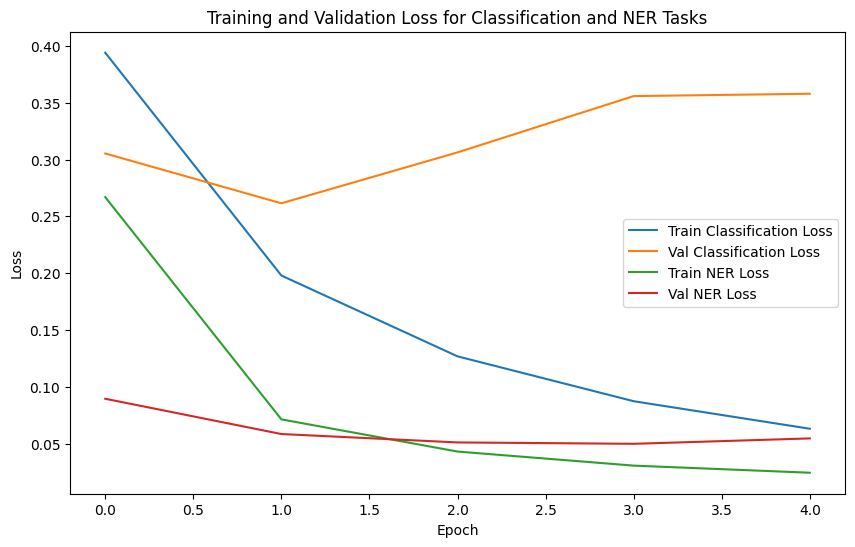


AG News Test Accuracy: 0.9211
CoNLL2003 NER Test Token Accuracy: 0.9790

=== Classification Task Demo Samples ===
Text: Fears for T N pension after talks Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.
True Label: Business | Predicted Label: Business
--------------------------------------------------------------------------------
Text: The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com) SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the  #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket.
True Label: Sci/Tech | Predicted Label: Sci/Tech
--------------------------------------------------------------------------------
Text: Ky. Company Wins Grant to Study Peptides (AP) AP - A company founded by a chemistry researcher at the University of Louisvi

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel, AdamW
from datasets import load_dataset
from itertools import cycle
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")


# Multi-Task Model Definition
class MultiTaskSentenceTransformer(nn.Module):
    def __init__(self, model_name='sentence-transformers/all-mpnet-base-v2', pooling_strategy='mean', num_classification_labels=4, num_ner_labels=5):
        """
        Multi-task model that extends a Sentence Transformer to support:
          - Task A: Sentence Classification
          - Task B: Named Entity Recognition
        """
        super(MultiTaskSentenceTransformer, self).__init__()
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.transformer = AutoModel.from_pretrained(model_name)
        if pooling_strategy not in ['mean', 'cls']:
            raise ValueError("Unsupported pooling strategy. Choose 'mean' or 'cls'.")
        self.pooling_strategy = pooling_strategy
        hidden_size = self.transformer.config.hidden_size
        self.classifier = nn.Linear(hidden_size, num_classification_labels)
        self.ner_head = nn.Linear(hidden_size, num_ner_labels)

    def forward(self, sentences=None, inputs=None):
        """
        Forward pass for either raw sentences (for classification) or pre-tokenized inputs (for NER).
        """
        if inputs is None:
            if sentences is None:
                raise ValueError("Either sentences or inputs must be provided.")
            inputs = self.tokenizer(sentences, return_tensors="pt", padding=True, truncation=True)
        device = next(self.parameters()).device
        inputs = {k: v.to(device) for k, v in inputs.items()}

        outputs = self.transformer(**inputs)
        token_embeddings = outputs.last_hidden_state  # (batch_size, seq_length, hidden_size)

        if self.pooling_strategy == 'cls':
            sentence_embeddings = token_embeddings[:, 0, :]
        else:
            sentence_embeddings = torch.mean(token_embeddings, dim=1)

        classification_logits = self.classifier(sentence_embeddings)
        ner_logits = self.ner_head(token_embeddings)

        return {
            'classification_logits': classification_logits,
            'ner_logits': ner_logits,
            'inputs': inputs
        }


# Datasets
class AGNewsDataset(Dataset):
    def __init__(self, dataset):
        """
        AG News Dataset wrapper
        """
        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        return {
            'text': item['text'],
            'label': item['label']
        }

class CoNLL2003NERDataset(Dataset):
    def __init__(self, split='train', tokenizer=None, max_length=128):
        """
        CoNLL2003 NER Dataset wrapper
        Args:
            split (str): Which split to load ('train', 'validation', or 'test')
            tokenizer: Tokenizer to use
            max_length (int): Maximum sequence length
        """
        self.dataset = load_dataset("conll2003", split=split, trust_remote_code=True)
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.orig_ner_labels = self.dataset.features["ner_tags"].feature.names
        self.reduced_label_map = {"O": 0, "PER": 1, "ORG": 2, "LOC": 3, "MISC": 4} # Reduced label mapping

    def align_labels(self, tokens, ner_tags):
        """
        Convert original ner_tags to reduced labels
        """
        reduced_tags = []
        for tag in ner_tags:
            label = self.orig_ner_labels[tag]
            if label == "O":
                reduced_tags.append(self.reduced_label_map["O"])
            else:
                # Remove the B- or I- prefix.
                entity = label.split("-")[-1]
                reduced_tags.append(self.reduced_label_map.get(entity, 0))
        return reduced_tags

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        tokens = item["tokens"]
        ner_tags = item["ner_tags"]
        reduced_tags = self.align_labels(tokens, ner_tags)
        # Tokenize with is_split_into_words=True so that we can align subwords.
        encoding = self.tokenizer(tokens, is_split_into_words=True,
                                  truncation=True, padding='max_length',
                                  max_length=self.max_length, return_tensors="pt")
        # Get word_ids to map subword tokens back to original tokens.
        word_ids = encoding.word_ids(batch_index=0)
        aligned_labels = []
        previous_word_idx = None
        for word_idx in word_ids:
            if word_idx is None:
                aligned_labels.append(-100)  # Special tokens will be ignored in loss computation.
            elif word_idx != previous_word_idx:
                aligned_labels.append(reduced_tags[word_idx])
            else:
                aligned_labels.append(-100)
            previous_word_idx = word_idx
        # Remove batch dimension.
        encoding = {k: v.squeeze(0) for k, v in encoding.items()}
        encoding["labels"] = torch.tensor(aligned_labels)
        return encoding


# Main Training, Evaluation and Plotting Routine
# Some hyperparameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_epochs = 50
batch_size = 16
learning_rate = 3e-5

# Instantiate the multi-task model.
model = MultiTaskSentenceTransformer(
    model_name='sentence-transformers/all-mpnet-base-v2',
    pooling_strategy='mean',
    num_classification_labels=4,  # AG News categories
    num_ner_labels=5              # Reduced NER labels: O, PER, ORG, LOC, MISC
)
model.to(device)


# Prepare a Subset of AG News Dataset
full_agnews = load_dataset("ag_news", split="train").shuffle(seed=42)
subset_size = int(0.10 * len(full_agnews)) # Select only 10% of the dataset.
subset_agnews = full_agnews.select(range(subset_size))
train_val_split = subset_agnews.train_test_split(test_size=0.2, seed=42)
agnews_train_dataset = train_val_split['train']
agnews_val_dataset = train_val_split['test']


print("AG News Training set size:", len(agnews_train_dataset))
print("AG News Validation set size:", len(agnews_val_dataset))

train_agnews_loader = DataLoader(agnews_train_dataset, batch_size=batch_size, shuffle=True)
val_agnews_loader = DataLoader(agnews_val_dataset, batch_size=batch_size, shuffle=False)


# Prepare CoNLL2003 NER Dataset
ner_tokenizer = model.tokenizer  # Reuse the model's tokenizer.
train_conll_dataset = CoNLL2003NERDataset(split="train", tokenizer=ner_tokenizer)
val_conll_dataset = CoNLL2003NERDataset(split="validation", tokenizer=ner_tokenizer)

print("\nCoNLL2003 Training set size:", len(train_conll_dataset))
print("CoNLL2003 Validation set size:", len(val_conll_dataset))

train_conll_loader = DataLoader(train_conll_dataset, batch_size=batch_size, shuffle=True)
val_conll_loader = DataLoader(val_conll_dataset, batch_size=batch_size, shuffle=False)


# Some hyperparameters
classification_loss_fn = nn.CrossEntropyLoss()
ner_loss_fn = nn.CrossEntropyLoss(ignore_index=-100)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# For plotting losses over epochs.
train_loss_history = []
val_loss_history = []
accuracy_history = []

# Training Loop
best_val_loss = float('inf')
patience = 3
patience_counter = 0
num_steps = max(len(train_agnews_loader), len(train_conll_loader))

print("\nStarting training...")
train_cls_loss_history = []
train_ner_loss_history = []
val_cls_loss_history = []
val_ner_loss_history = []

for epoch in range(num_epochs):
    model.train()
    total_cls_loss = 0.0
    total_ner_loss = 0.0
    steps = 0

    agnews_iter = cycle(train_agnews_loader)
    conll_iter = cycle(train_conll_loader)

    scaler = torch.amp.GradScaler('cuda')
    for _ in tqdm(range(num_steps), desc=f"Epoch {epoch+1}/{num_epochs}"):
        optimizer.zero_grad()
        with torch.cuda.amp.autocast():
            # Classification step
            batch_cls = next(agnews_iter)
            texts = batch_cls['text']
            cls_labels = batch_cls['label'].to(device)
            outputs_cls = model(sentences=texts)
            cls_logits = outputs_cls['classification_logits']
            loss_cls = classification_loss_fn(cls_logits, cls_labels)

            # NER step
            batch_ner = next(conll_iter)
            outputs_ner = model(inputs=batch_ner)
            ner_logits = outputs_ner['ner_logits']
            ner_labels = batch_ner['labels'].to(device)
            loss_ner = ner_loss_fn(ner_logits.view(-1, model.ner_head.out_features), ner_labels.view(-1))

            loss = loss_cls + loss_ner

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        # Update loss trackers and step counter
        total_cls_loss += loss_cls.item()
        total_ner_loss += loss_ner.item()
        steps += 1

    avg_cls_loss = total_cls_loss / steps
    avg_ner_loss = total_ner_loss / steps
    train_cls_loss_history.append(avg_cls_loss)
    train_ner_loss_history.append(avg_ner_loss)
    print(f"Epoch {epoch+1}/{num_epochs} - Train Classification Loss: {avg_cls_loss:.4f}, Train NER Loss: {avg_ner_loss:.4f}")


    # Validation step
    model.eval()
    total_val_cls_loss = 0.0
    total_val_ner_loss = 0.0
    val_steps = 0

    # Validate Classification Task
    for batch in val_agnews_loader:
        texts = batch['text']
        cls_labels = torch.tensor(batch['label']).to(device)
        outputs = model(sentences=texts)
        cls_logits = outputs['classification_logits']
        loss_cls = classification_loss_fn(cls_logits, cls_labels)
        total_val_cls_loss += loss_cls.item()
        val_steps += 1

    # Validate NER Task
    for batch in val_conll_loader:
        outputs = model(inputs=batch)
        ner_logits = outputs['ner_logits']
        ner_labels = batch['labels'].to(device)
        loss_ner = ner_loss_fn(ner_logits.view(-1, model.ner_head.out_features),
                               ner_labels.view(-1))
        total_val_ner_loss += loss_ner.item()
        val_steps += 1

    avg_val_cls_loss = total_val_cls_loss / (len(val_agnews_loader))
    avg_val_ner_loss = total_val_ner_loss / (len(val_conll_loader))
    val_cls_loss_history.append(avg_val_cls_loss)
    val_ner_loss_history.append(avg_val_ner_loss)

    print(f"Epoch {epoch+1} - Val Classification Loss: {avg_val_cls_loss:.4f}, "
          f"Val NER Loss: {avg_val_ner_loss:.4f}")

    # Early stopping check
    avg_val_loss = avg_val_cls_loss + avg_val_ner_loss
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        best_model_state = model.state_dict()
        torch.save(best_model_state, "best_model.pth")  # Save best model to disk.
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

print("\nTraining complete.")
model.load_state_dict(best_model_state)


# Loss curves
plt.figure(figsize=(10, 6))
plt.plot(train_cls_loss_history, label="Train Classification Loss")
plt.plot(val_cls_loss_history, label="Val Classification Loss")
plt.plot(train_ner_loss_history, label="Train NER Loss")
plt.plot(val_ner_loss_history, label="Val NER Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss for Classification and NER Tasks")
plt.legend()
plt.show()

# Evaluation on Test Set
# AG News Test Evaluation.
test_agnews = load_dataset("ag_news", split="test")
test_agnews_dataset = AGNewsDataset(test_agnews)
test_agnews_loader = DataLoader(test_agnews_dataset, batch_size=batch_size, shuffle=False)
all_test_preds = []
all_test_labels = []
model.eval()
with torch.no_grad():
    for batch in test_agnews_loader:
        texts = batch['text']
        labels = torch.tensor(batch['label']).to(device)
        outputs = model(sentences=texts)
        logits = outputs['classification_logits']
        preds = torch.argmax(logits, dim=1)
        all_test_preds.extend(preds.cpu().numpy())
        all_test_labels.extend(labels.cpu().numpy())
test_accuracy = accuracy_score(all_test_labels, all_test_preds)
print(f"\nAG News Test Accuracy: {test_accuracy:.4f}")

# CoNLL2003 NER Test Evaluation.
test_conll_dataset = CoNLL2003NERDataset(split="test", tokenizer=ner_tokenizer)
test_conll_loader = DataLoader(test_conll_dataset, batch_size=batch_size, shuffle=False)
total_tokens = 0
correct_tokens = 0
with torch.no_grad():
    for batch in test_conll_loader:
        outputs = model(inputs=batch)
        ner_logits = outputs['ner_logits']  # (batch_size, seq_length, num_ner_labels)
        preds = torch.argmax(ner_logits, dim=2)
        labels = batch['labels'].to(device)
        # Count correct predictions where label != -100.
        mask = labels != -100
        correct_tokens += ((preds == labels) & mask).sum().item()
        total_tokens += mask.sum().item()
ner_test_accuracy = correct_tokens / total_tokens if total_tokens > 0 else 0.0
print(f"CoNLL2003 NER Test Token Accuracy: {ner_test_accuracy:.4f}")


# Demo Evaluation on a Few Samples
classification_labels = {0: "World", 1: "Sports", 2: "Business", 3: "Sci/Tech"}
sample_count = 3
printed_samples = 0

print("\n=== Classification Task Demo Samples ===")
model.eval()
with torch.no_grad():
    for batch in test_agnews_loader:
        texts = batch['text']
        true_labels = batch['label']
        outputs = model(sentences=texts)
        preds = torch.argmax(outputs['classification_logits'], dim=1)

        for text, true_label, pred in zip(texts, true_labels, preds):
            true_label_int = true_label.item() if isinstance(true_label, torch.Tensor) else true_label
            pred_int = pred.item() if isinstance(pred, torch.Tensor) else pred

            print(f"Text: {text}")
            print(f"True Label: {classification_labels[true_label_int]} | Predicted Label: {classification_labels[pred_int]}")
            print("-" * 80)
            printed_samples += 1
            if printed_samples >= sample_count:
                break
        if printed_samples >= sample_count:
            break


ner_labels = {0: "O", 1: "PER", 2: "ORG", 3: "LOC", 4: "MISC"}
sample_count = 3
printed_ner_samples = 0

print("\n=== NER Task Demo Samples ===")
for batch in val_conll_loader:
    input_ids = batch["input_ids"]
    with torch.no_grad():
        outputs = model(inputs=batch)
    ner_logits = outputs["ner_logits"]
    preds = torch.argmax(ner_logits, dim=2)

    for i in range(input_ids.size(0)):
        tokens = model.tokenizer.convert_ids_to_tokens(input_ids[i].tolist())
        pred_labels = preds[i].tolist()
        ner_output = [f"{token}:{ner_labels.get(idx, 'Unknown')}" for token, idx in zip(tokens, pred_labels)]
        print("NER Sample:")
        print(" ".join(ner_output))
        print("-" * 80)
        printed_ner_samples += 1
        if printed_ner_samples >= sample_count:
            break
    if printed_ner_samples >= sample_count:
        break


In [2]:
# !pip freeze > requirements.txt